In [1]:

import sys
sys.path.insert(1, '/home/msantolaria/Documents/MyPythonLibrary/ClimAnag/')
import climbasis as climb
from climbasis import *
import domain as dom
import myplot
import glob
from eofs.xarray import Eof
from myplot import *
import obsinfo as obs
from obsinfo import *



In [2]:
source='/home/msantolaria/Documents/MyResearch/AnalysisObservations/'
resultsDir=source + 'Results/'
plotsDir=source + 'Plots/'

In [3]:
sourceData='/home/msantolaria/Documents/Data/'
sourceData1=sourceData +'noaaV2c/'
sourceData2=sourceData +'era5/'
sourceData3=sourceData +'aphro/'
sourceData4=sourceData +'gpcc/'
sourceData5=sourceData +'cru/'
sourceData6=sourceData +'gpcp/'

In [64]:
iyr=1951
fyr=2015
domain='TP'
variable='pr'
units='mm/day'
season='DJF'
exp='obs'

In [65]:
model3='aphro'
fileName3='APHRO_mon_MA_025deg_V1101_EXR1.1951-2015.nc'
ds3 = xr.open_dataset(sourceData3+fileName3)['precip']
field3=dom.field_dom(ds3,domain)
print(ds3.attrs)

{'long_name': 'daily precipitation analysis interpolated onto 0.25deg grids [mm/day]', 'units': 'mm/day', 'cell_methods': 'time: mean', 'level_description': 'Earth surface'}


In [66]:
data4='gpcc'
model4='gpcc'
info4=obs.get_obs('precip',data4)
print(info4)
fileName4=info4.get('filename')
ds4= xr.open_dataset(sourceData+data4+'/'+fileName4)['precip']
#month_length = ds0.time.dt.days_in_month
#
#ds=ds0/month_length
units='mm'
print(ds4)
# replace all values equal to -1000 with np.nan
#ds = ds_fill[variable].where(ds_fill[variable] != -1000.)
if info4.get('gridlon')=='0_360':
    ds4=dom.shifting_grid(ds4)
lat,lon=climb.latlon(ds4)
ylat=ds4.coords[lat]
xlon=ds4.coords[lon]


field40=dom.field_dom(ds4,domain)

month_length = field40.time.dt.days_in_month
#
field4=field40/month_length

month_length = field0dom.time.dt.days_in_month
field=field0dom/month_length
{'var': 'precip', 'filename': 'precip.monthly_v2022_1891_2020_10.nc', 'units': 'mm', 'gridlon': '0_360', 'gridlat': '90_-90'}
{'var': 'precip', 'filename': 'precip.monthly_v2022_1891_2020_10.nc', 'units': 'mm', 'gridlon': '0_360', 'gridlat': '90_-90'}
<xarray.DataArray 'precip' (time: 1560, lat: 180, lon: 360)>
[101088000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1891-01-01 1891-02-01 ... 2020-12-01
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
Attributes:
    long_name:    gpcc full data monthly product version 2022, precipitation ...
    units:        mm/month
    code:         20
    institution:  DWD


In [67]:
model5='cru'
fileName5='cru_ts4.05.1901.2020.pre.dat.nc'
ds5 = xr.open_dataset(sourceData5+fileName5)['pre']
print(ds5.attrs)

field50=dom.field_dom(ds5,domain)

month_length = field50.time.dt.days_in_month
#
field5=field50/month_length

{'long_name': 'precipitation', 'units': 'mm/month', 'correlation_decay_distance': 450.0}


In [68]:
ds5 

<xarray.DataArray 'pre' (time: 1440, lat: 360, lon: 720)>
[373248000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [69]:
dsList=[field3,field4,field5]
modelList=[model3,model4,model5]

In [70]:
valsList=[]
anomsList=[]

for elem in dsList:
    if season[0]=='m':
        rmon=int(season.split('mon')[1])
        vals,anoms=climb.monthly_selection(elem,rmon,iyr,fyr)
    else:
        vals,anoms=climb.seasonal_selection(elem,season,iyr,fyr)
    valsList.append(vals)
    anomsList.append(anoms)

(D- 1951  JF- 1952  to D- 2014 JF- 2015
(D- 1951  JF- 1952  to D- 2014 JF- 2015
(D- 1951  JF- 1952  to D- 2014 JF- 2015


In [71]:
climList=[]
stdList=[]
for elem in valsList:
    c=elem.mean('time')
    s=elem.std('time')
    climList.append(c)
    stdList.append(s)

In [72]:
##Plotting
###
infoplot=myplot.get_var_infos(variable)
cmapClim=infoplot.get('cmap')
units=infoplot.get('units')
clevsClim= np.arange(0,5.25,0.25)#infoplot.get('levels')

cmapStd=infoplot.get('cmap_std')
clevsStd=np.arange(0,40,5)#infoplot.get('levels_std')

clevsT=np.arange(-0.5,0.55,0.05)#infoplot.get('levels_diff')
cmapT=infoplot.get('cmap_diff')

clevsRatio=np.arange(0,1.1,0.1)
cmapRatio='OrRd'

extend=infoplot.get('extend')
extentTF=False


0-label 1- units 2-levels 3-cmap 4-extend 5-levels_diff 6-cmap_diff 7-extend_diff 8-levels_std 9-cmap_std 10-extend_std


Figure save at  /home/msantolaria/Documents/MyResearch/AnalysisObservations/Plots/ as clim_pr_aphro_obs_TP_DJF_1951_2015


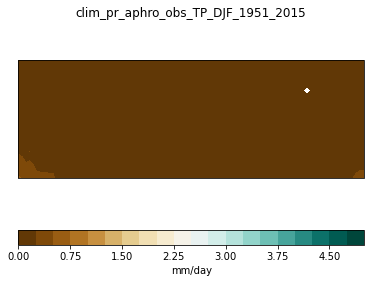

Figure save at  /home/msantolaria/Documents/MyResearch/AnalysisObservations/Plots/ as clim_pr_gpcc_obs_TP_DJF_1951_2015


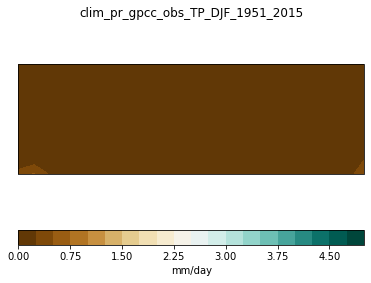

Figure save at  /home/msantolaria/Documents/MyResearch/AnalysisObservations/Plots/ as clim_pr_cru_obs_TP_DJF_1951_2015


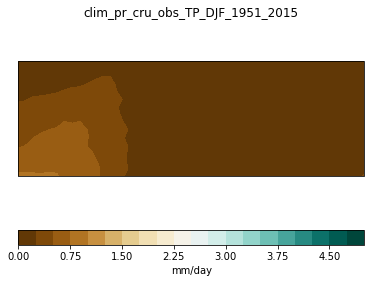

In [73]:
for i,clim in enumerate(climList):
##Clim
##
    latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)

    fig,axs= plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(8,10))
    lat,lon=climb.latlon(clim)
    lons, lats = np.meshgrid(clim[lon] ,clim[lat])
    CS1=axs.contourf(lons,lats, clim,clevsClim,
            transform=ccrs.PlateCarree(),
            cmap=cmapClim,extent='both')
# Draw the coastines for each subplot
    axs.coastlines()
    axs.add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
#axs.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='None', facecolor='None'))
    if extentTF==True:
        axs.set_extent([lonW, lonE, latS,latN])
    # Longitude and latitude labels
# Adjust the location of the subplots on the page to make room for the colorbar
    fig.subplots_adjust(bottom=0.35, top=0.7, left=0.20, right=0.80,
                wspace=0.05, hspace=0.5)
# Add a colorbar axis at the bottom of the graph
#([xmin,ymin,dx,dy])
    cbar_ax = fig.add_axes([0.2, 0.35, 0.6, 0.02])
# Draw the colorbar
    cbar=fig.colorbar(CS1, cax=cbar_ax,orientation='horizontal',label='%s'%(units))
## Add a big title at the top
    ofileC='clim_'+variable+'_'+modelList[i]+'_'+exp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    plt.suptitle(ofileC,y=0.68)
    fig.savefig(plotsDir+ofileC+'.png',format='png')
    print('Figure save at ',plotsDir, 'as',ofileC)
    plt.show()


In [74]:
#climList[1].plot()

In [75]:
parList=[]
trendList=[]
interceptList=[]
rvalueList=[]
pvalueList=[]
stderrList=[]
#---------------------------------------------------------
for elem in anomsList:
    par=climb.trend_vect(elem.time,elem,'time')
    parList.append(par)
    trendList.append(par[0])
    interceptList.append(par[1])
    rvalueList.append(par[2])
    pvalueList.append(par[3])
    stderrList.append(par[4])


trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


Figure save at  /home/msantolaria/Documents/MyResearch/AnalysisObservations/Plots/ as spatialtrend_pr_aphro_obs_TP_DJF_1951_2015


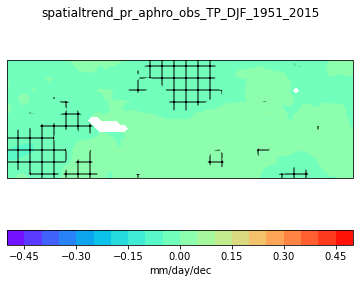

Figure save at  /home/msantolaria/Documents/MyResearch/AnalysisObservations/Plots/ as spatialtrend_pr_gpcc_obs_TP_DJF_1951_2015


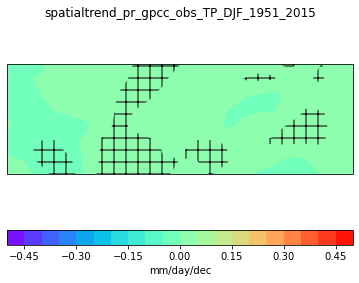

Figure save at  /home/msantolaria/Documents/MyResearch/AnalysisObservations/Plots/ as spatialtrend_pr_cru_obs_TP_DJF_1951_2015


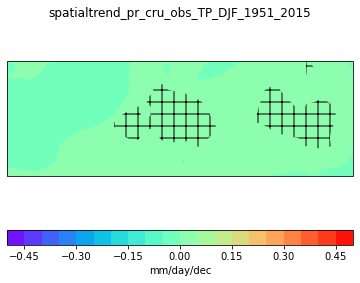

In [76]:
for i,par in enumerate(parList):
##
##Spatial trend
###
    fig,axs= plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(8,10))

    lat,lon=climb.latlon(par[0])
    lons, lats = np.meshgrid(par[0][lon] ,par[0][lat])
    CS1=axs.contourf(lons,lats, 10*par[0][:,:],clevsT,
                transform=ccrs.PlateCarree(),
                cmap=cmapT,extent='both')
    levels=[0,0.1,1.0]
    cs = axs.contourf(lons,lats,par[3][:,:], transform=ccrs.PlateCarree(),levels=levels,
                hatches=["+", ""], alpha=0.)

# Draw the coastines for each subplot
    axs.coastlines()
    axs.add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
#axs.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='None', facecolor='None'))
    if extentTF==True:
        axs.set_extent([lonW, lonE, latS,latN])
    # Longitude and latitude labels
# Adjust the location of the subplots on the page to make room for the colorbar
    fig.subplots_adjust(bottom=0.35, top=0.7, left=0.20, right=0.80,
                wspace=0.05, hspace=0.5)
# Add a colorbar axis at the bottom of the graph
#([xmin,ymin,dx,dy])
    cbar_ax = fig.add_axes([0.2, 0.35, 0.6, 0.02])
# Draw the colorbar
    cbar=fig.colorbar(CS1, cax=cbar_ax,orientation='horizontal',label='%s/dec'%(units))
## Add a big title at the top
    ofileT='spatialtrend_'+variable+'_'+modelList[i]+'_'+exp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    plt.suptitle(ofileT,y=0.68)
    fig.savefig(plotsDir+ofileT+'.png',format='png')
    print('Figure save at ',plotsDir, 'as',ofileT)
    plt.show()


In [77]:
##Computing time series of seasonal spatial average ----------------------------
print('Computing time series of seasonal spatial average')
ts_seasonList=[]
for i,anoms in enumerate(anomsList):
    ts_season=climb.spatial_average(anoms)
    ts_seasonList.append(ts_season)
    plotnameTs='timeseries_anoms_'+variable+'_'+modelList[i]+'_'+exp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    np.savetxt(resultsDir+plotnameTs+'.txt',ts_season)
#print('saving .txt at',resultsDir+plotnameTs)


Computing time series of seasonal spatial average


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] [1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014]


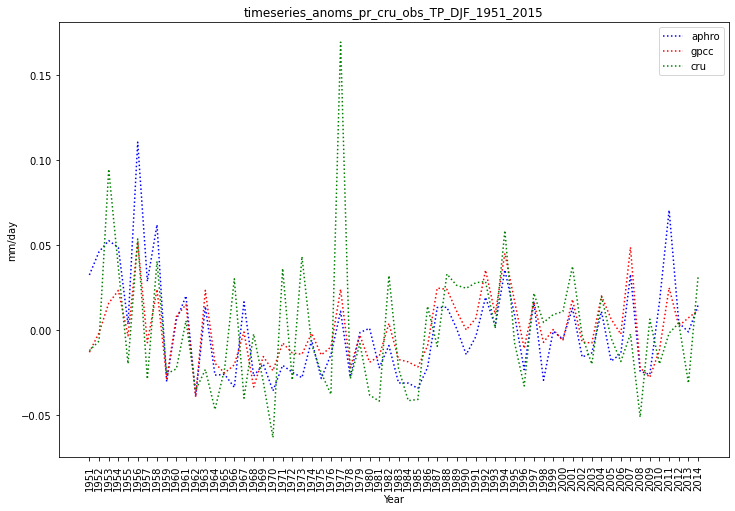

In [78]:
xd=np.arange(0,len(ts_season),1)

fig, ax = plt.subplots(figsize=(12, 8))
my_ticks=xd+iyr
print(xd,my_ticks)
ticks=np.arange(iyr,fyr+1,1)
#ax.plot(xd,ts_season,color='b', linewidth=2)
ax.plot(xd, ts_seasonList[0], 'b:',label=modelList[0])
ax.plot(xd, ts_seasonList[1], 'r:',label=modelList[1])
ax.plot(xd, ts_seasonList[2], 'g:',label=modelList[2])
#ax.plot(xd, parmed[1] + parmed[0] * xd, 'r-',label="%s (%.2f)" % ('Theil-Sen', 10*parmed[0]))
#ax.plot(xd, parmed[1] + parmed[2] * xd, 'r--')
#ax.plot(xd, parmed[1] + parmed[3] * xd, 'r--')
#ax.plot(xd, par[1] + par[0] * xd, 'b-',label="%s (%.2f);%s (%.2f)" % ('Lin reg', 10*par[0],'p-val',par[3]))
#ax.plot(xd, parmk[8] + parmk[7] * xd,'p-',label="%s (%.2f) sig %s" % ('MK',i 10*parmk[7],parmk[0]))

#ax.axhline(0, color='k')
#ax.set_ylim(0, 3)
ax.set_xlabel('Year')
ax.set_ylabel('%s'%(units))
ax.set_title(plotnameTs)
freq=5
plt.xticks(xd,my_ticks, rotation='vertical')
plt.legend()
#plt.savefig(plotsDir+plotnameTs+'.png',format='png')
plt.show()
